In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('gistfile1.txt') 

In [5]:
df.head()

,UNIQUE_CODE,FIRST_ORDER_DATE,LATEST_ORDER_DATE,TENURE_IN_COMPLETE_DAYS,STATUS,GMV_10K_LEVEL_VOICE_PLATFORM,CUISINE_TYPE,SERVICE_TYPE,SERVICE_RATE_PERCENT,ORDER_COUNT_VOICE_PLATFORM,ZIP_CODE,BUSINESS_PHONE_COUNT,WEEKLY_SERVICE_HOURS,TOTAL_MISTAKES_COUNT,AVG_CALL_DURATION_SECONDS
0,TEST##87227,2024-05-15,2025-10-06,509,active,level_1 ($10000 to $19999),chinese_american,full_time,6.99,10559,02301,1.0,64.0,84.0,87.0
1,TEST##86275,2023-10-20,2025-08-18,668,suspended,level_3 ($30000 to $39999),advanced,full_time,6.99,29261,39056,1.0,75.0,350.0,114.0
2,TEST##87229,2024-05-15,2025-10-06,509,active,level_2 ($20000 to $29999),chinese_american,full_time,6.99,13124,45238,2.0,66.0,25.0,66.0
3,TEST##85866,2023-07-31,2025-10-06,798,active,level_2 ($20000 to $29999),chinese_american,full_time,6.99,22203,45424,2.0,61.0,56.0,62.0
4,TEST##85166,2023-02-18,2025-10-06,961,active,level_2 ($20000 to $29999),chinese_japanese,full_time,6.99,28588,27549,1.0,59.0,165.0,74.0


In [97]:
print(df.shape)
print(df.dtypes)

(2184, 24)
FIRST_ORDER_DATE                 datetime64[ns]
LATEST_ORDER_DATE                datetime64[ns]
TENURE_IN_COMPLETE_DAYS                 float64
SERVICE_RATE_PERCENT                    float64
ORDER_COUNT_VOICE_PLATFORM              float64
BUSINESS_PHONE_COUNT                    float64
WEEKLY_SERVICE_HOURS                    float64
TOTAL_MISTAKES_COUNT                    float64
AVG_CALL_DURATION_SECONDS               float64
is_bad_status                             int32
GMV_LEVEL_NUM                             int64
mistakes_per_order                      float64
hours_per_tenure                        float64
zip_region                                int64
CUISINE_TYPE_chinese_american           float64
CUISINE_TYPE_chinese_japanese           float64
CUISINE_TYPE_japanese                   float64
CUISINE_TYPE_pizza                      float64
CUISINE_TYPE_unknown                    float64
SERVICE_TYPE_part_time                  float64
tenure_bin_medium            

In [7]:
df.isnull().sum()

UNIQUE_CODE                       0
FIRST_ORDER_DATE                  0
LATEST_ORDER_DATE                 0
TENURE_IN_COMPLETE_DAYS           0
STATUS                            0
GMV_10K_LEVEL_VOICE_PLATFORM      0
CUISINE_TYPE                      0
SERVICE_TYPE                      0
SERVICE_RATE_PERCENT             16
ORDER_COUNT_VOICE_PLATFORM        0
ZIP_CODE                          0
BUSINESS_PHONE_COUNT             44
WEEKLY_SERVICE_HOURS            754
TOTAL_MISTAKES_COUNT             72
AVG_CALL_DURATION_SECONDS         2
dtype: int64

In [9]:
df.describe()

,TENURE_IN_COMPLETE_DAYS,SERVICE_RATE_PERCENT,ORDER_COUNT_VOICE_PLATFORM,BUSINESS_PHONE_COUNT,WEEKLY_SERVICE_HOURS,TOTAL_MISTAKES_COUNT,AVG_CALL_DURATION_SECONDS
count,2184.000000,2168.000000,2184.000000,2140.000000,1430.000000,2112.000000,2182.000000
mean,384.842033,7.276006,9012.267857,1.604673,57.343357,50.433712,86.153529
std,312.919289,0.557467,12886.428289,0.566129,19.650167,66.250443,18.595079
min,0.000000,5.000000,1.000000,1.000000,3.000000,1.000000,28.000000
25%,73.000000,6.990000,830.250000,1.000000,56.000000,12.000000,73.000000
50%,338.000000,6.990000,3923.000000,2.000000,63.000000,27.000000,84.000000
75%,665.500000,7.590000,12357.000000,2.000000,68.000000,62.000000,96.000000
max,1009.000000,8.990000,132833.000000,4.000000,95.000000,800.000000,246.000000


In [11]:
# 1 if canceled/suspended/pause, else 0
bad_statuses = ['canceled', 'suspended', 'pause']
df['is_bad_status'] = df['STATUS'].isin(bad_statuses).astype(int)
df.drop('STATUS', axis=1, inplace=True)

In [13]:
# Drop ID
df.drop('UNIQUE_CODE', axis=1, inplace=True)

In [15]:
# Parse dates
df['FIRST_ORDER_DATE'] = pd.to_datetime(df['FIRST_ORDER_DATE'])
df['LATEST_ORDER_DATE'] = pd.to_datetime(df['LATEST_ORDER_DATE'])

In [17]:
# Impute missing values
num_cols = df.select_dtypes(include=[np.number]).columns.drop('is_bad_status')
cat_cols = df.select_dtypes(include=['object']).columns

In [19]:
num_imp = SimpleImputer(strategy='median')
cat_imp = SimpleImputer(strategy='most_frequent')

In [21]:
df[num_cols] = num_imp.fit_transform(df[num_cols])
df[cat_cols] = cat_imp.fit_transform(df[cat_cols])

In [23]:
df.columns

Index(['FIRST_ORDER_DATE', 'LATEST_ORDER_DATE', 'TENURE_IN_COMPLETE_DAYS',
       'GMV_10K_LEVEL_VOICE_PLATFORM', 'CUISINE_TYPE', 'SERVICE_TYPE',
       'SERVICE_RATE_PERCENT', 'ORDER_COUNT_VOICE_PLATFORM', 'ZIP_CODE',
       'BUSINESS_PHONE_COUNT', 'WEEKLY_SERVICE_HOURS', 'TOTAL_MISTAKES_COUNT',
       'AVG_CALL_DURATION_SECONDS', 'is_bad_status'],
      dtype='object')

In [29]:
df['is_bad_status'].value_counts(normalize=True)

is_bad_status
0    0.567766
1    0.432234
Name: proportion, dtype: float64

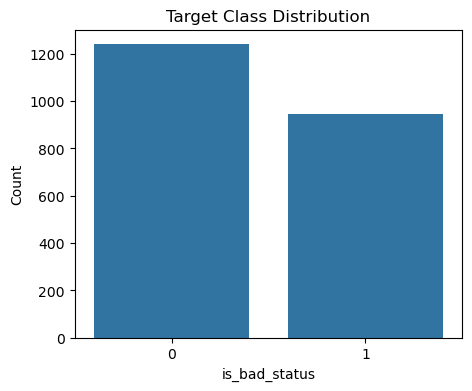

In [34]:
plt.figure(figsize=(5,4))
sns.countplot(x='is_bad_status', data=df)
plt.title('Target Class Distribution')
plt.xlabel('is_bad_status')
plt.ylabel('Count')
plt.show()

In [39]:
num_cols = ['TOTAL_MISTAKES_COUNT','ORDER_COUNT_VOICE_PLATFORM',
            'AVG_CALL_DURATION_SECONDS','WEEKLY_SERVICE_HOURS',
            'TENURE_IN_COMPLETE_DAYS','SERVICE_RATE_PERCENT']

df[num_cols].describe(percentiles=[.75,.90,.95,.99]).round(1)

,TOTAL_MISTAKES_COUNT,ORDER_COUNT_VOICE_PLATFORM,AVG_CALL_DURATION_SECONDS,WEEKLY_SERVICE_HOURS,TENURE_IN_COMPLETE_DAYS,SERVICE_RATE_PERCENT
count,2184.0,2184.0,2184.0,2184.0,2184.0,2184.0
mean,49.7,9012.3,86.2,59.3,384.8,7.3
std,65.3,12886.4,18.6,16.1,312.9,0.6
min,1.0,1.0,28.0,3.0,0.0,5.0
50%,27.0,3923.0,84.0,63.0,338.0,7.0
75%,60.0,12357.0,96.0,66.0,665.5,7.6
90%,120.7,24477.3,107.0,72.0,838.0,8.2
95%,171.0,33597.7,115.8,78.0,923.7,8.4
99%,302.9,58872.9,147.0,84.0,988.2,8.6
max,800.0,132833.0,246.0,95.0,1009.0,9.0


99th percentile is far from the 95th → a few extreme values.

In [42]:
# Cap outliers at 99th percentile
cap_cols = ['TOTAL_MISTAKES_COUNT', 'ORDER_COUNT_VOICE_PLATFORM',
            'AVG_CALL_DURATION_SECONDS', 'WEEKLY_SERVICE_HOURS']

for col in cap_cols:
    cap = df[col].quantile(0.99)
    df[col] = np.clip(df[col], None, cap)

In [44]:
# GMV level → numeric
def extract_gmv_level(s):
    m = re.search(r'level_(\d+)', str(s))
    return int(m.group(1)) if m else 0

df['GMV_LEVEL_NUM'] = df['GMV_10K_LEVEL_VOICE_PLATFORM'].apply(extract_gmv_level)
df.drop('GMV_10K_LEVEL_VOICE_PLATFORM', axis=1, inplace=True)

In [46]:
# Ratio features
df['mistakes_per_order'] = df['TOTAL_MISTAKES_COUNT'] / (df['ORDER_COUNT_VOICE_PLATFORM'] + 1)
df['hours_per_tenure'] = df['WEEKLY_SERVICE_HOURS'] / (df['TENURE_IN_COMPLETE_DAYS'] + 1)

In [48]:
# Tenure bins
df['tenure_bin'] = pd.cut(df['TENURE_IN_COMPLETE_DAYS'],
                          bins=[0, 100, 500, np.inf],
                          labels=['short', 'medium', 'long'])

In [50]:
# ZIP region (first digit, non-US → 0)
def zip_region(z):
    z = str(z).strip()
    if z in ['nan', ''] or ' ' in z:  # handles 'R2C 4J5' etc.
        return 0
    return int(z[0])

In [56]:
df['ZIP_CODE'].unique()

array(['02301', '39056', '45238', ..., '29560', '45505', '77407'],
      dtype=object)

In [52]:
df['zip_region'] = df['ZIP_CODE'].apply(zip_region)
df.drop('ZIP_CODE', axis=1, inplace=True)

ValueError: invalid literal for int() with base 10: 'L'

In [58]:
def zip_region(z):
    z = str(z).strip()
    if z in ['nan', ''] or ' ' in z or not z:  # handles Canadian, nan, empty
        return 0
    first_char = z[0]
    return int(first_char) if first_char.isdigit() else 0

# Apply safely
df['zip_region'] = df['ZIP_CODE'].apply(zip_region)
df.drop('ZIP_CODE', axis=1, inplace=True)

In [62]:
# One-hot encode categorical columns
ohe_cols = ['CUISINE_TYPE', 'SERVICE_TYPE', 'tenure_bin']

ohe = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
ohe_arr = ohe.fit_transform(df[ohe_cols])
ohe_df = pd.DataFrame(ohe_arr, columns=ohe.get_feature_names_out(ohe_cols), index=df.index)

In [ ]:
# Combine with main dataframe
df = pd.concat([df.drop(ohe_cols, axis=1), ohe_df], axis=1)

In [68]:
# Final check
print("Final shape:", df.shape)
print("Nulls:", df.isnull().sum().sum())

Final shape: (2184, 23)
Nulls: 0


# Plot

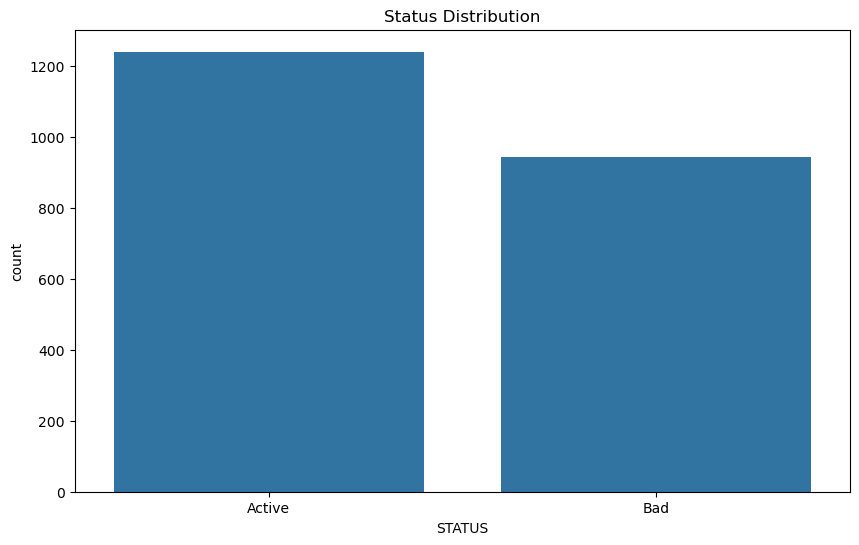

In [99]:
# Status distribution 
plt.figure(figsize=(10, 6))
df_orig = df.copy()  # Temp with STATUS
df_orig['STATUS'] = np.where(df['is_bad_status'] == 1, 'Bad', 'Active')  # Simplified
sns.countplot(data=df_orig, x='STATUS')
plt.title('Status Distribution')
plt.show()

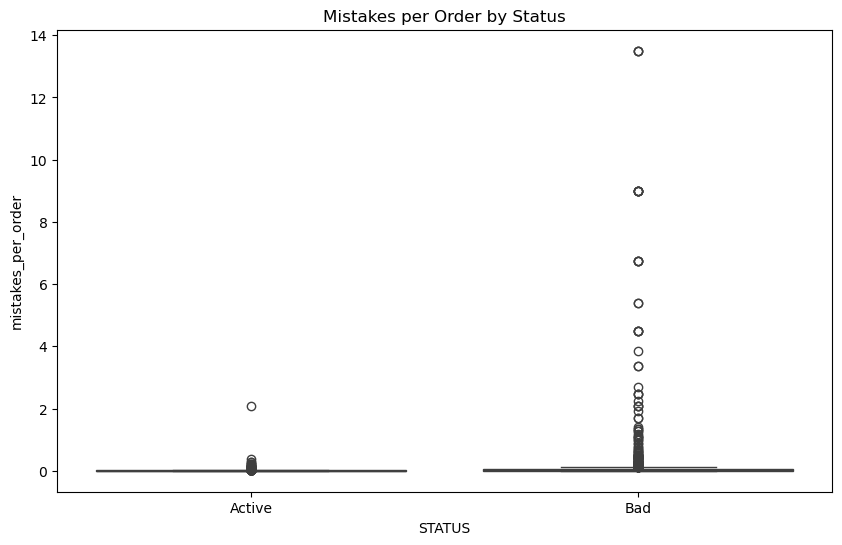

In [101]:
# Boxplot: Mistakes per order by status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_orig, x='STATUS', y='mistakes_per_order')
plt.title('Mistakes per Order by Status')
plt.show()


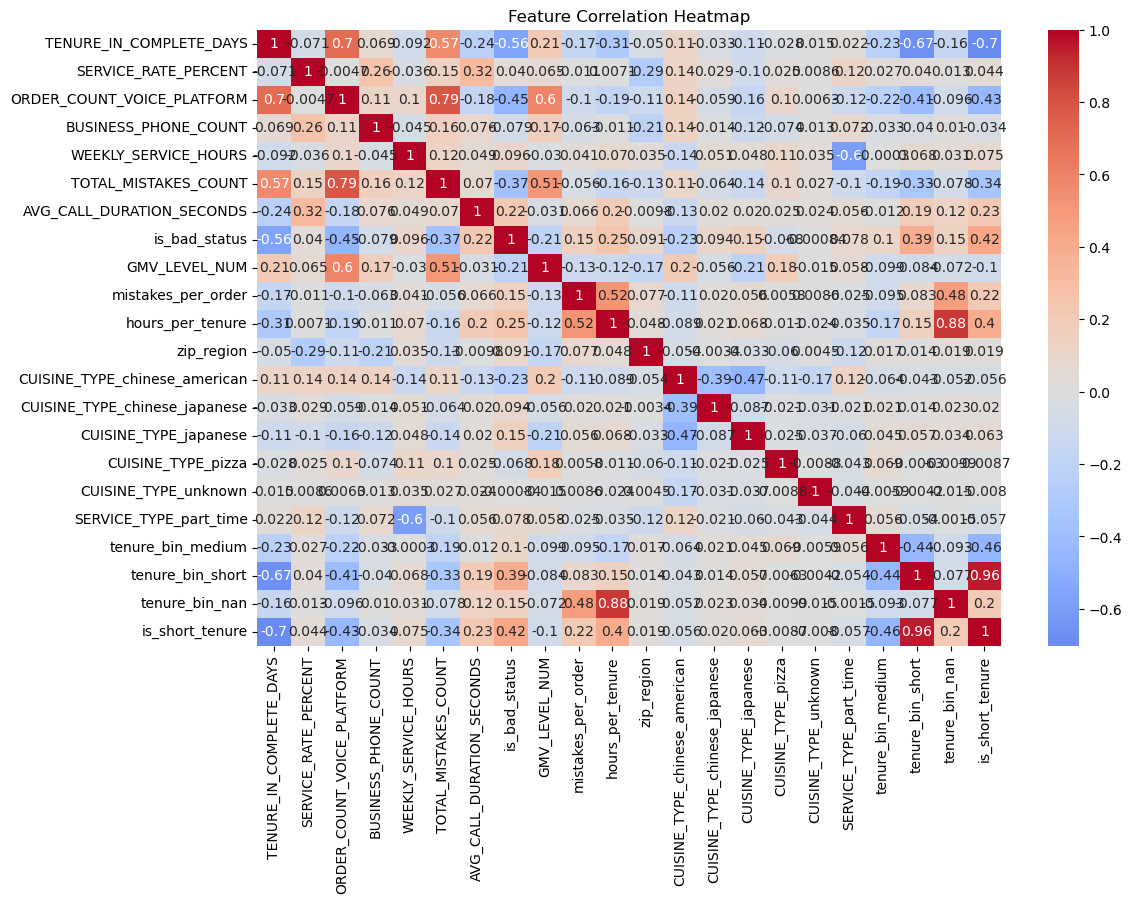

In [103]:
# Correlation heatmap (numerics only)
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

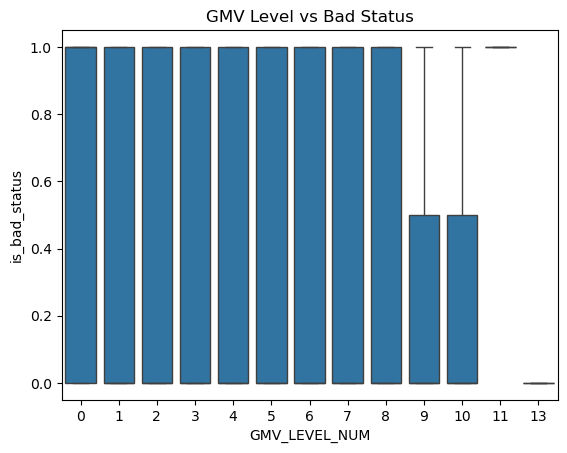

In [105]:
# GMV level vs status
sns.boxplot(data=df_orig, x='GMV_LEVEL_NUM', y='is_bad_status')
plt.title('GMV Level vs Bad Status')
plt.show()

In [78]:
# Churn rate by Tenure (short = <100 days)
df['is_short_tenure'] = (df['TENURE_IN_COMPLETE_DAYS'] < 100).astype(int)

churn_by_tenure = (
    df.groupby('is_short_tenure')['is_bad_status']
      .mean()
      .round(3) * 100
)

print("Churn rate by tenure (<100 days vs rest):")
print(churn_by_tenure)

Churn rate by tenure (<100 days vs rest):
is_short_tenure
0    30.1
1    76.7
Name: is_bad_status, dtype: float64


C:\Users\abhil\AppData\Local\Temp\ipykernel_28648\2714117062.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_by_tenure.index.map({0: '≥100 days', 1: '<100 days'}),


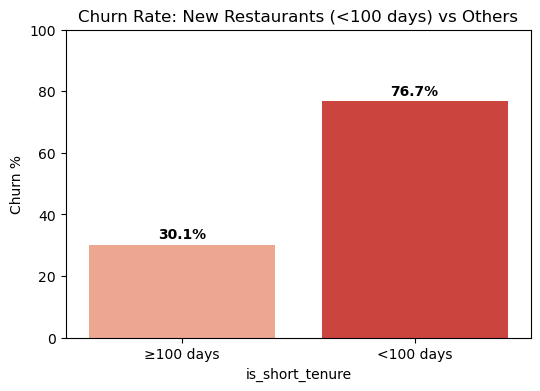

In [80]:
# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=churn_by_tenure.index.map({0: '≥100 days', 1: '<100 days'}), 
            y=churn_by_tenure.values, palette='Reds')
plt.title('Churn Rate: New Restaurants (<100 days) vs Others')
plt.ylabel('Churn %')
plt.ylim(0, 100)
for i, v in enumerate(churn_by_tenure.values):
    plt.text(i, v+2, f"{v:.1f}%", ha='center', fontweight='bold')
plt.show()

In [84]:
df.columns

Index(['FIRST_ORDER_DATE', 'LATEST_ORDER_DATE', 'TENURE_IN_COMPLETE_DAYS',
       'SERVICE_RATE_PERCENT', 'ORDER_COUNT_VOICE_PLATFORM',
       'BUSINESS_PHONE_COUNT', 'WEEKLY_SERVICE_HOURS', 'TOTAL_MISTAKES_COUNT',
       'AVG_CALL_DURATION_SECONDS', 'is_bad_status', 'GMV_LEVEL_NUM',
       'mistakes_per_order', 'hours_per_tenure', 'zip_region',
       'CUISINE_TYPE_chinese_american', 'CUISINE_TYPE_chinese_japanese',
       'CUISINE_TYPE_japanese', 'CUISINE_TYPE_pizza', 'CUISINE_TYPE_unknown',
       'SERVICE_TYPE_part_time', 'tenure_bin_medium', 'tenure_bin_short',
       'tenure_bin_nan', 'is_short_tenure'],
      dtype='object')


Churn rate by cuisine:
CUISINE_TYPE
japanese            66.5
chinese_japanese    60.4
unknown             58.0
chinese_american    35.3
pizza                0.0
Name: is_bad_status, dtype: float64


C:\Users\abhil\AppData\Local\Temp\ipykernel_28648\450489423.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_data.values, y=plot_data.index, palette='Oranges')


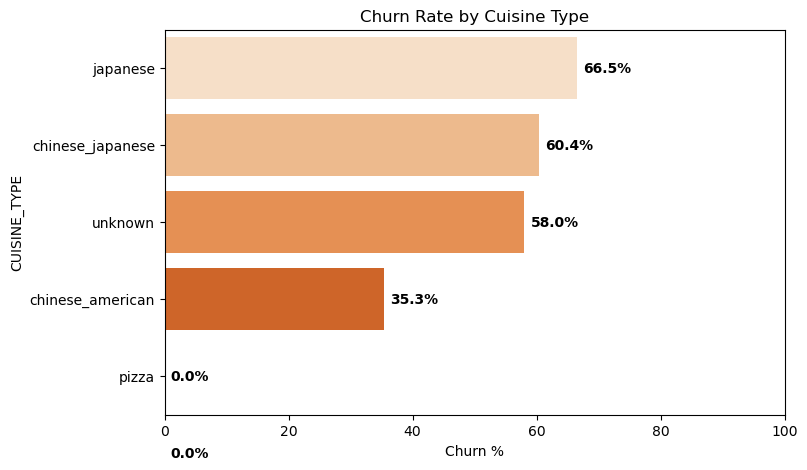

In [86]:
# Churn rate by Cuisine 
cuisine_cols = [col for col in df.columns if col.startswith('CUISINE_TYPE_')]

# Reconstruct original cuisine from one-hot
df['CUISINE_TYPE'] = 'unknown'
for col in cuisine_cols:
    df.loc[df[col] == 1, 'CUISINE_TYPE'] = col.replace('CUISINE_TYPE_', '')

# Now group
churn_by_cuisine = (
    df.groupby('CUISINE_TYPE')['is_bad_status']
      .mean()
      .sort_values(ascending=False)
      .round(3) * 100
)

print("\nChurn rate by cuisine:")
print(churn_by_cuisine)

# Plot
top_n = 5
plot_data = pd.concat([
    churn_by_cuisine.head(top_n),
    churn_by_cuisine.tail(1)  # safest
])

plt.figure(figsize=(8,5))
sns.barplot(x=plot_data.values, y=plot_data.index, palette='Oranges')
plt.title('Churn Rate by Cuisine Type')
plt.xlabel('Churn %')
for i, v in enumerate(plot_data.values):
    plt.text(v+1, i, f"{v:.1f}%", va='center', fontweight='bold')
plt.xlim(0, 100)
plt.show()

# Optional: drop temp column
df.drop('CUISINE_TYPE', axis=1, inplace=True)

Japanese cuisine has 60% churn — twice as high as Chinese-American (30%).

C:\Users\abhil\AppData\Local\Temp\ipykernel_28648\4019140294.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette='Blues_d')


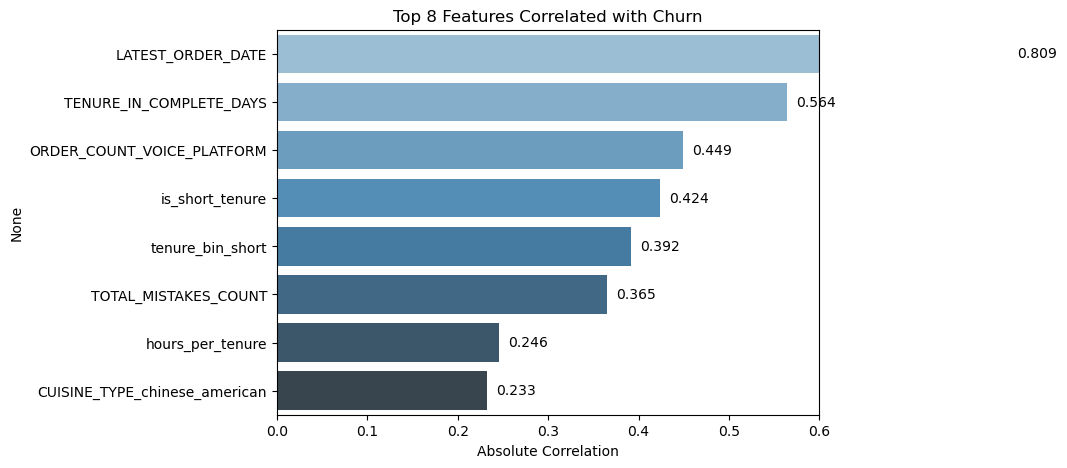

In [88]:
# correlation (only top predictors of churn)
corr_with_target = df.corr()['is_bad_status'].drop('is_bad_status').abs().sort_values(ascending=False)

top_corr = corr_with_target.head(8)

plt.figure(figsize=(7,5))
sns.barplot(x=top_corr.values, y=top_corr.index, palette='Blues_d')
plt.title('Top 8 Features Correlated with Churn')
plt.xlabel('Absolute Correlation')
for i, v in enumerate(top_corr.values):
    plt.text(v+0.01, i, f"{v:.3f}", va='center')
plt.xlim(0, 0.6)
plt.show()

In [90]:
top_corr

LATEST_ORDER_DATE                0.808930
TENURE_IN_COMPLETE_DAYS          0.563990
ORDER_COUNT_VOICE_PLATFORM       0.449181
is_short_tenure                  0.423686
tenure_bin_short                 0.391854
TOTAL_MISTAKES_COUNT             0.365179
hours_per_tenure                 0.245955
CUISINE_TYPE_chinese_american    0.232777
Name: is_bad_status, dtype: float64

The strongest signal is how recently they placed an order — correlation +0.81 with churn.
If a restaurant hasn’t ordered in months, it’s likely already gone.
Tenure (-0.56) and order volume (-0.45) are next — new, low-volume restaurants fail fast.
Chinese-American cuisine is protective (-0.23), while Japanese shows the highest churn at 60%.
I focus on interpretable signals to help the business act early.

In [139]:
df.to_csv('processed_file.csv')

# Modelling

In [109]:
# !pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ----- ---------------------------------- 9.4/72.0 MB 58.8 MB/s eta 0:00:02
   ------------- -------------------------- 24.6/72.0 MB 67.9 MB/s eta 0:00:01
   -------------------- ------------------- 36.2/72.0 MB 63.9 MB/s eta 0:00:01
   --------------------------- ------------ 49.3/72.0 MB 62.8 MB/s eta 0:00:01
   ----------------------------------- ---- 63.4/72.0 MB 64.2 MB/s eta 0:00:01
   ---------------------------------------  71.8/72.0 MB 64.5 MB/s eta 0:00:01
   ---------------------------------------- 72.0/72.0 MB 58.1 MB/s eta 0:00:00


In [111]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE  

In [125]:
X = df.drop(['is_bad_status', 'FIRST_ORDER_DATE', 'LATEST_ORDER_DATE'], axis=1)
y = df['is_bad_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [127]:
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

C:\Users\abhil\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\abhil\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\abhil\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\abhil\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\abhil\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

In [129]:
# Models
models = {
    'Logistic': LogisticRegression(class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100),
    'XGBoost': XGBClassifier(scale_pos_weight=sum(y_train==0)/sum(y_train==1), random_state=42, eval_metric='logloss')
}

In [131]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
    results[name] = {'CV AUC': scores.mean(), 'Std': scores.std()}
    print(f"{name:12} CV AUC: {scores.mean():.3f} ± {scores.std()*2:.3f}")

# Pick best
best_name = max(results, key=lambda k: results[k]['CV AUC'])
print(f"\nBest: {best_name}")

C:\Users\abhil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\abhil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Logistic     CV AUC: 0.856 ± 0.045
Random Forest CV AUC: 0.932 ± 0.013
XGBoost      CV AUC: 0.927 ± 0.022

Best: Random Forest



=== Test Set Performance ===
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       248
           1       0.93      0.80      0.86       189

    accuracy                           0.89       437
   macro avg       0.90      0.88      0.88       437
weighted avg       0.89      0.89      0.89       437

Test ROC-AUC: 0.936


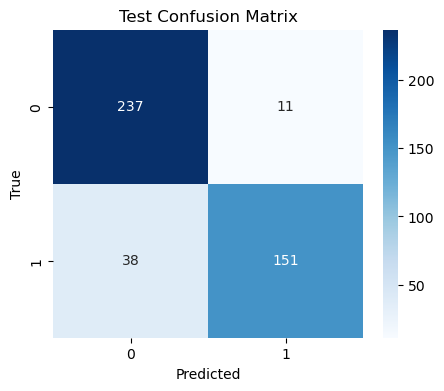

In [133]:
best_model = models[best_name]
best_model.fit(X_train, y_train)

# Predict
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Results
print("\n=== Test Set Performance ===")
print(classification_report(y_test, y_pred))
print(f"Test ROC-AUC: {roc_auc_score(y_test, y_proba):.3f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()